## Contents

- 결합 탐색
- 조건 탐색
- 변수 탐색
- 인코딩
- 시각적 탐색

In [ ]:
import numpy as np
import pandas as pd
data1 = np.arange(1,21).reshape(4,5)
data2 = np.arange(11,31).reshape(5,4)
df1 = pd.DataFrame(data1, columns=list('abcde'))
df2 = pd.DataFrame(data2, columns=list('dehi'))
print(df1,'\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


In [ ]:
# 행방향 결합
con1 = pd.concat([df1,df2], axis = 0)
con1

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
0,NaN,NaN,NaN,11,12,13.0,14.0
1,NaN,NaN,NaN,15,16,17.0,18.0
2,NaN,NaN,NaN,19,20,21.0,22.0
3,NaN,NaN,NaN,23,24,25.0,26.0
4,NaN,NaN,NaN,27,28,29.0,30.0


In [ ]:
# 행 방향 결합후 인덱스 재배치
con1 = pd.concat([df1,df2],axis = 0, ignore_index = True)
con1

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
4,NaN,NaN,NaN,11,12,13.0,14.0
5,NaN,NaN,NaN,15,16,17.0,18.0
6,NaN,NaN,NaN,19,20,21.0,22.0
7,NaN,NaN,NaN,23,24,25.0,26.0
8,NaN,NaN,NaN,27,28,29.0,30.0


In [ ]:
# 열 방향 결합
con2 = pd.concat([df1,df2], axis = 1)
con2

,a,b,c,d,e,d,e,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [ ]:
df1['ind'] = [1,2,3,4]
df1

,a,b,c,d,e,ind
0,1,2,3,4,5,1
1,6,7,8,9,10,2
2,11,12,13,14,15,3
3,16,17,18,19,20,4


In [ ]:
df2['ind'] = [1,2,3,4,5]
df2

,d,e,h,i,ind
0,11,12,13,14,1
1,15,16,17,18,2
2,19,20,21,22,3
3,23,24,25,26,4
4,27,28,29,30,5


* merge() 함수는 sql의 join 명령과 비슷한 방식으로 어떤 기준에 의해 두 데이터프레임을 병합한는 개념
* 기준이 되는 열이나 인덱스를 키라고 부름
* 키가 되는 열이나 인덱스는 반드시 양쪽 데이터프레임에 모두 존재함

In [ ]:
# pd.merge(df1,df2,on = 'ind', how = 'outer')
pd.merge(df1,df2,on='ind') #default = inner

,a,b,c,d_x,e_x,ind,d_y,e_y,h,i
0,1,2,3,4,5,1,11,12,13,14
1,6,7,8,9,10,2,15,16,17,18
2,11,12,13,14,15,3,19,20,21,22
3,16,17,18,19,20,4,23,24,25,26


In [ ]:
df1 = df1.drop('ind',axis =1)
df2 = df2.drop('ind',axis =1)
print(df1,'\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


* 판다스 join() 메소드는 merge() 함수를 기반으로 만들어졌기 때문에 기본 작동 방식이 서로 비슷
* join() 메소드는 두 데이터프레임의 행 인덱스를 기준으로 결합하는 점에서 merge와 차이가 있으나 on=keys 옵션 설정하면 열을 기준으로 결합

In [ ]:
# join은 인덱스 기준으로 결합(default는 교집합)
# df1.join(df2, lsuffix='_1,rsuffix='_2')
df1.join(df2, lsuffix='_1',rsuffix='_2', how = 'inner')

,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1,2,3,4,5,11,12,13,14
1,6,7,8,9,10,15,16,17,18
2,11,12,13,14,15,19,20,21,22
3,16,17,18,19,20,23,24,25,26


In [ ]:
df1.join(df2, lsuffix='_1',rsuffix='_2', how = 'outer')

,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [ ]:
import pandas as pd

# 주식 데이터를 가져와서 데이터 프레임 만들기
filepath1 = '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/pandas/dataset/stock price.xlsx'
filepath2 = '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/pandas/dataset/stock valuation.xlsx'
df1 = pd.read_excel(filepath1, engine = 'openpyxl', index_col = 'id')
df2 = pd.read_excel(filepath2, engine = 'openpyxl', index_col = 'id')

print(df1,'\n')
print(df2)

       stock_name          value   price
id                                      
128940       한미약품   59385.666667  421000
130960     CJ E&M   58540.666667   98900
138250      엔에스쇼핑   14558.666667   13200
139480        이마트  239230.833333  254500
142280     녹십자엠에스     468.833333   10200
145990        삼양사   82750.000000   82000
185750        종근당   40293.666667  100500
192400      쿠쿠홀딩스  179204.666667  177500
199800         툴젠   -2514.333333  115400
204210     모두투어리츠    3093.333333    3475 

             name           eps     bps        per       pbr
id                                                          
130960     CJ E&M   6301.333333   54068  15.695091  1.829178
136480         하림    274.166667    3551  11.489362  0.887074
138040    메리츠금융지주   2122.333333   14894   6.313806  0.899691
139480        이마트  18268.166667  295780  13.931338  0.860437
145990        삼양사   5741.000000  108090  14.283226  0.758627
161390      한국타이어   5648.500000   51341   7.453306  0.820007
181710  NHN엔터테인먼트 

In [ ]:
# 데이터프레임 결합(join)
# df1의 행 인덱스를 기준으로 결합하는 how = 'left' 옵션이 기본 적용
df3 = df1.join(df2)
print(df3)

       stock_name          value   price    name           eps       bps  \
id                                                                         
128940       한미약품   59385.666667  421000     NaN           NaN       NaN   
130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068.0   
138250      엔에스쇼핑   14558.666667   13200     NaN           NaN       NaN   
139480        이마트  239230.833333  254500     이마트  18268.166667  295780.0   
142280     녹십자엠에스     468.833333   10200     NaN           NaN       NaN   
145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090.0   
185750        종근당   40293.666667  100500     종근당   3990.333333   40684.0   
192400      쿠쿠홀딩스  179204.666667  177500     NaN           NaN       NaN   
199800         툴젠   -2514.333333  115400     NaN           NaN       NaN   
204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335.0   

              per       pbr  
id                           
128940        NaN       NaN

In [ ]:
df4 = df1.join(df2, how = 'right')
print(df4)

       stock_name          value     price       name           eps     bps  \
id                                                                            
130960     CJ E&M   58540.666667   98900.0     CJ E&M   6301.333333   54068   
136480        NaN            NaN       NaN         하림    274.166667    3551   
138040        NaN            NaN       NaN    메리츠금융지주   2122.333333   14894   
139480        이마트  239230.833333  254500.0        이마트  18268.166667  295780   
145990        삼양사   82750.000000   82000.0        삼양사   5741.000000  108090   
161390        NaN            NaN       NaN      한국타이어   5648.500000   51341   
181710        NaN            NaN       NaN  NHN엔터테인먼트   2110.166667   78434   
185750        종근당   40293.666667  100500.0        종근당   3990.333333   40684   
204210     모두투어리츠    3093.333333    3475.0     모두투어리츠     85.166667    5335   
207940        NaN            NaN       NaN   삼성바이오로직스   4644.166667   60099   

              per       pbr  
id                   

In [ ]:
# 두 데이터프레임에 공통으로 존재하는 행 인덱스를 기준으로 추출
# 교집합
df4 = df1.join(df2, how = 'inner')
print(df4)

       stock_name          value   price    name           eps     bps  \
id                                                                       
130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068   
139480        이마트  239230.833333  254500     이마트  18268.166667  295780   
145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090   
185750        종근당   40293.666667  100500     종근당   3990.333333   40684   
204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335   

              per       pbr  
id                           
130960  15.695091  1.829178  
139480  13.931338  0.860437  
145990  14.283226  0.758627  
185750  25.185866  2.470259  
204210  40.802348  0.651359  


In [2]:
# Task1_0530. 고객 정보 데이터프레임과 구매 내역 데이터프레임을 결합하여 각 고객이름(name) 별 총 지출을 계산하여 출력하세요.
import pandas as pd

# 고객 정보 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})

# 구매 내역 데이터프레임 생성
purchases = pd.DataFrame({
    'purchase_id': [101, 102, 103, 104, 105],
    'customer_id': [1, 2, 1, 3, 2],
    'amount': [250, 150, 200, 300, 350]
})
print(customers,'\n')
print(purchases)


   customer_id     name
0            1    Alice
1            2      Bob
2            3  Charlie
3            4    David 

   purchase_id  customer_id  amount
0          101            1     250
1          102            2     150
2          103            1     200
3          104            3     300
4          105            2     350


In [4]:
cus_pur = pd.merge(customers,purchases,on='customer_id',how = 'left')
cus_pur.groupby('name').amount.sum()

,name,amount
0,Alice,450.0
1,Bob,500.0
2,Charlie,300.0
3,David,0.0


In [3]:
# 내부조인으로 결합
merged_df = pd.merge(customers,purchases,on='customer_id',how = 'inner')
# 고객별 총 지출 계산
total_spent = merged_df.groupby('name').amount.sum().reset_index()
print(total_spent)

      name  amount
0    Alice     450
1      Bob     500
2  Charlie     300


In [ ]:
result = customers.join(purchases.set_index('customer_id'), on = 'customer_id')
result.groupby('name').amount.sum()

name
Alice      450.0
Bob        500.0
Charlie    300.0
David        0.0
Name: amount, dtype: float64

In [5]:
# Task2_0530. 학생 성적 데이터프레임과 과목 데이터프레임을 결합하여 각 과목별 평균 성적을 계산하여 출력하세요.
import pandas as pd

# 학생 성적 데이터프레임 생성
grades = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 1, 2, 3, 4],
    'subject_id': [101, 101, 102, 102, 103, 103, 101, 103],
    'grade': [85, 90, 78, 88, 92, 95, 80, 85]
})

# 과목 데이터프레임 생성
subjects = pd.DataFrame({
    'subject_id': [101, 102, 103],
    'subject_name': ['Math', 'Science', 'History']
})
print(grades,'\n')
print(subjects)

   student_id  subject_id  grade
0           1         101     85
1           2         101     90
2           3         102     78
3           4         102     88
4           1         103     92
5           2         103     95
6           3         101     80
7           4         103     85 

   subject_id subject_name
0         101         Math
1         102      Science
2         103      History


In [9]:
total = pd.merge(grades,subjects,on = 'subject_id')
total.groupby('subject_name').grade.mean()

subject_name
History    90.666667
Math       85.000000
Science    83.000000
Name: grade, dtype: float64

In [13]:
merged_df = pd.merge(grades,subjects,on = 'subject_id',how = 'inner')
average_grades = merged_df.groupby('subject_name').grade.mean().reset_index()
print(average_grades)

  subject_name      grade
0      History  90.666667
1         Math  85.000000
2      Science  83.000000


In [11]:
total = grades.join(subjects.set_index('subject_id'), on='subject_id')
total.groupby('subject_name').grade.mean().reset_index()

,subject_name,grade
0,History,90.666667
1,Math,85.000000
2,Science,83.000000


In [ ]:
df4

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


In [ ]:
# Q. df4에서 중복된 칼럼을 삭제한후 불린 인덱싱을 이용하여 eps가 3000보다 적거나 stock_name이 이마트인 데이터를 선택하여 데이터프레임을 생성하고 df5 이름으로 저장 및 출력
# 단 < , == 반드시 사용

# df4.drop('name', axis = 1)
# df5 = df4[(df4['eps'] < 3000) or (df4['stock_name'] == '이마트')] -> or 연산자는 bool 시리즈에서 사용불가
df5 = df4[(df4['eps'] < 3000) | (df4['stock_name'] == '이마트')]
df5

,stock_name,value,price,eps,bps,per,pbr
id,,,,,,,
139480,이마트,239230.833333,254500,18268.166667,295780,13.931338,0.860437
204210,모두투어리츠,3093.333333,3475,85.166667,5335,40.802348,0.651359


In [ ]:
import numpy as np

data = np.arange(20).reshape(4,5)
df = pd.DataFrame(data, columns = ['a','b','c','d','e'])
df.head()

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
df1 = df.copy()
print(df1,'\n')
df1.drop(df1.index[0])

    a   b   c   d   e
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19 



,a,b,c,d,e
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
df1[df1.a >10]

,a,b,c,d,e
3,15,16,17,18,19


In [ ]:
idx = df1[df1.a >10].index
print(idx,'\n')
df1.drop(idx)

Index([3], dtype='int64') 



,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


In [ ]:
con1 = df.a >10
con2 = df.b == 16
con3 = df.e > 15

df[con1 & con2 & con3]

,a,b,c,d,e
3,15,16,17,18,19


In [ ]:
cond1 = df.a >5
cond2 = df.b == 16
cond3 = df.e >5

df[cond1 | cond2 | cond3]

,a,b,c,d,e
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
df[cond1][['a','b']]

,a,b
2,10,11
3,15,16


In [15]:
# Task3_0530. 고객 데이터프레임에서 age가 30 이상이고 spending이 500 이상인 고객을 찾아 출력하세요.
import pandas as pd

# 예제 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'age': [25, 35, 30, 40, 28],
    'spending': [300, 600, 500, 700, 400]
})
customers

,customer_id,name,age,spending
0,1,Alice,25,300
1,2,Bob,35,600
2,3,Charlie,30,500
3,4,David,40,700
4,5,Eve,28,400


In [ ]:
customers[(customers['age'] >= 30) & (customers['spending']>= 500)]

,customer_id,name,age,spending
1,2,Bob,35,600
2,3,Charlie,30,500
3,4,David,40,700


In [16]:
# 조건에 만족하는 고객 찾기
con1 = customers['age'] >= 30
con2 = customers['spending']>= 500

filtered_customers = customers[con1&con2]
print(filtered_customers)

   customer_id     name  age  spending
1            2      Bob   35       600
2            3  Charlie   30       500
3            4    David   40       700


In [17]:
# Task4_0530. 학생 성적 데이터프레임에서 math_score가 80 이상 90 이하인 학생을 찾아 출력하세요.
import pandas as pd

# 예제 데이터프레임 생성
students = pd.DataFrame({
    'student_id': [101, 102, 103, 104, 105],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'math_score': [75, 85, 88, 92, 78],
    'english_score': [80, 78, 82, 88, 90]
})
students

,student_id,name,math_score,english_score
0,101,Alice,75,80
1,102,Bob,85,78
2,103,Charlie,88,82
3,104,David,92,88
4,105,Eve,78,90


In [ ]:
students[(80 <= students['math_score']) & (students['math_score']<= 90)]

,student_id,name,math_score,english_score
1,102,Bob,85,78
2,103,Charlie,88,82


In [19]:
c1 = 80 <= students['math_score']
c2 = students['math_score']<= 90
filtered_students = students[c1 & c2]
print(filtered_students)

   student_id     name  math_score  english_score
1         102      Bob          85             78
2         103  Charlie          88             82


In [31]:
import seaborn as sns
df = sns.load_dataset('titanic')
tdf = df.copy()
tdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
tdf.rename(columns = {'sex':'gender','fare':'ticket'}, inplace = True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 값변경
df1=tdf[['gender']].replace(['female','male'], [1,0])
df1.gender.value_counts()

gender
0    577
1    314
Name: count, dtype: int64

In [ ]:
# 칼럼 대문자 변경
tdf.rename(str.upper, axis = 'columns',inplace = True)
tdf.head()

,SURVIVED,PCLASS,GENDER,AGE,SIBSP,PARCH,TICKET,EMBARKED,CLASS,WHO,ADULT_MALE,DECK,EMBARK_TOWN,ALIVE,ALONE
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 칼럼 소문자 변경
tdf.rename(str.lower, axis = 'columns',inplace = True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df2.columns

Index(['name', 'eps', 'bps', 'per', 'pbr'], dtype='object')

In [ ]:
# 칼럼 순서 변경
columns_customed = ['pclass','sex','age','survived']
df2[columns_customed].head()

In [ ]:
tdf1 = tdf[['age','ticket']].head()
tdf1

,age,ticket
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [ ]:
tdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     5 non-null      float64
 1   ticket  5 non-null      float64
dtypes: float64(2)
memory usage: 208.0 bytes


In [ ]:
tdf1 = tdf1.astype({'age':'int', 'ticket':'int'})
tdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     5 non-null      int64
 1   ticket  5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [ ]:
# age 컬럼의 값 구성 체크
tdf.age.value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [ ]:
tdf.age.value_counts().sort_index()

age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: count, Length: 88, dtype: int64

In [ ]:
# age 컬럼의 고유 구성 요소
tdf.age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
def get_category(age):
    if age < 3:
        return 'Baby'
    elif age <10:
        return 'Child'
    elif age < 20:
        return 'Teenager'
    elif age <30:
        return 'Young Adult'
    elif age < 60:
        return 'Adult'
    else:
        return 'Elderly'

        # 'baby' 'child' 'teenager' 'young Adult' 'adult' 'Elderly
tdf['age_cat'] = tdf.age.apply(lambda x: get_category(x))
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Young Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Young Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult


In [ ]:
category = ['Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Elderly']
ages = tdf.age.fillna(0).values
tdf['cat'] = pd.cut(ages, bins = [0,1,10,25,35,50,100], labels=category)
tdf

In [20]:
from google.colab import files
# 마운트 안하고 파일 사용하기
# 파일 업로드
uploaded = files.upload()

Saving titanic3.csv to titanic3.csv


In [21]:
import pandas as pd

# 데이터 프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
# Task5_0530. 주어진 titanic3 데이터셋에서 survived 열을 사용하여 생존자와 비생존자의 수를 계산하여 출력하세요.
import pandas as pd

# 데이터프레임 읽기
# 구글 마운트하여 사용
# file_path = '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/pandas/dataset/titanic3.csv'
# df = pd.read_csv(file_path)

df.survived.value_counts()

survived
0    809
1    500
Name: count, dtype: int64

In [23]:
# Task6_0530. 주어진 titanic3 데이터셋에서 pclass 열을 기준으로 각 객실 등급의 평균 운임(fare)을 계산하여 출력하세요.

df.groupby('pclass').fare.mean()

pclass
1    87.508992
2    21.179196
3    13.302889
Name: fare, dtype: float64

In [ ]:
# Task7_0530. titanic3 각 변수의 상관계수를 통해 각 변수와 목표 변수(생존 여부) 간의 관계를 파악하세요.

# 숫자형 데이터 타입만 가진 컬럼만 선택
df_number = df.select_dtypes(include=[np.number]).columns

# 생존여부간의 상관계수
df[df_number].corr()['survived']

pclass     -0.312469
survived    1.000000
age        -0.055512
sibsp      -0.027825
parch       0.082660
fare        0.244265
body             NaN
Name: survived, dtype: float64

In [24]:
import numpy as np

# 문자열 변수를 숫자형으로 변환
df['sex'] = df['sex'].map({'male':0,'female':0})

# 숫자형 변수만 선택
numeric_df = df.select_dtypes(include=[np.number])

# 상관계수 계산
correlation_matrix = numeric_df.corr()

# 생존 여부와의 상관계수 정렬
survival_correlation = correlation_matrix['survived'].sort_values(ascending=False)
print(survival_correlation)

survived    1.000000
fare        0.244265
parch       0.082660
sibsp      -0.027825
age        -0.055512
pclass     -0.312469
sex              NaN
body             NaN
Name: survived, dtype: float64


In [ ]:
# Task8_0530. 승객의 가족 크기(동반한 형제자매/배우자 수와 부모/자녀 수의 합)가 생존에 영향을 미치는지를 탐색하여 결과를 출력하세요.
df.parch.value_counts()

parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: count, dtype: int64

In [ ]:
# parch별로 전체 사람수
total_sur_count = df.groupby('parch').count()
# parch별 생존한 사람수
sur_count = df[df['survived'] ==1].groupby('parch').count()
# 생존한 사람/ 전체사람 * 100 , parch별 생존률
sur_count.survived/total_sur_count.survived *100

parch
0    33.532934
1    58.823529
2    50.442478
3    62.500000
4    16.666667
5    16.666667
6          NaN
9          NaN
Name: survived, dtype: float64

In [26]:
# 가족 크기 계산
df['family_size'] = df['sibsp']+df['parch']

# 생존 여부와 가족 크기의 관계 탐색
survival_family_correlation = df[['family_size','survived']].corr().iloc[0,1]
print(survival_family_correlation)

0.02687643412533259


In [27]:
 df[['family_size','survived']].corr()

,family_size,survived
family_size,1.000000,0.026876
survived,0.026876,1.000000


In [29]:
round(df[['family_size','survived']].corr().iloc[0,1],2)

0.03

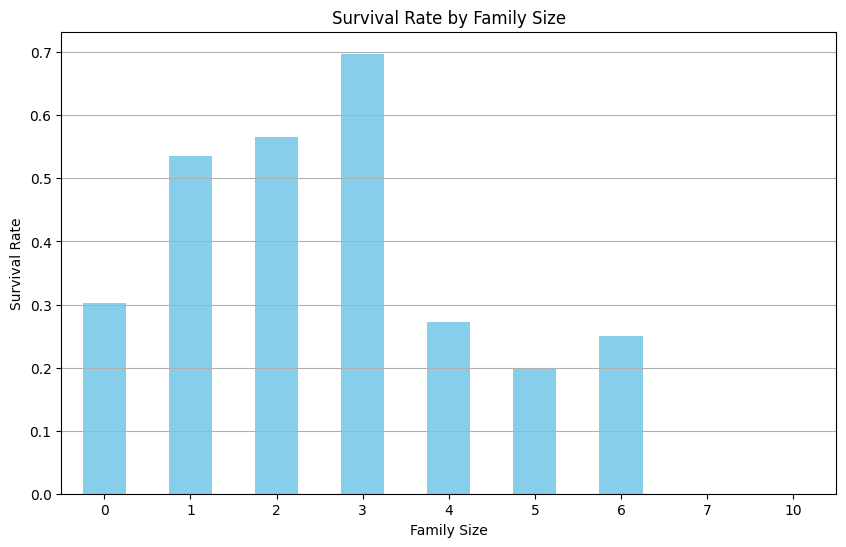

In [28]:
import matplotlib.pyplot as plt

# 가족 크기별 생존율 계산
family_survival_rate = df.groupby('family_size')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))
family_survival_rate.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

In [ ]:
total_sur_count

,pclass,survived,name,sex,age,sibsp,ticket,fare,cabin,embarked,boat,body,home.dest
parch,,,,,,,,,,,,,
0,1002,1002,1002,1002,768,1002,1002,1001,205,1000,324,103,530
1,170,170,170,170,160,170,170,170,56,170,98,10,115
2,113,113,113,113,97,113,113,113,29,113,57,5,84
3,8,8,8,8,8,8,8,8,3,8,5,0,8
4,6,6,6,6,5,6,6,6,2,6,1,1,2
5,6,6,6,6,6,6,6,6,0,6,1,2,4
6,2,2,2,2,2,2,2,2,0,2,0,0,2
9,2,2,2,2,0,2,2,2,0,2,0,0,0


In [ ]:
sur_count

,pclass,survived,name,sex,age,sibsp,ticket,fare,cabin,embarked,boat,body,home.dest
parch,,,,,,,,,,,,,
0,336,336,336,336,270,336,336,336,126,334,315,0,213
1,100,100,100,100,95,100,100,100,42,100,98,0,77
2,57,57,57,57,55,57,57,57,22,57,57,0,50
3,5,5,5,5,5,5,5,5,2,5,5,0,5
4,1,1,1,1,1,1,1,1,1,1,1,0,1
5,1,1,1,1,1,1,1,1,0,1,1,0,1


In [ ]:
df.parch.value_counts()

parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: count, dtype: int64

In [ ]:
df[['parch','survived']].corr()
df[['parch','survived']].corr()['survived']

parch       0.08266
survived    1.00000
Name: survived, dtype: float64

In [ ]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
# Task9_0530. 객실 등급별 평균 요금(mean_fare_by_pclass)이 생존에 미치는 영향을 분석하기 위해 mean_fare_by_pclass라는 파생 변수를 생성하여 출력하세요.

total_sur_count = df.groupby('pclass').fare.mean()

sur_count = df[df['survived'] ==1].groupby('pclass').fare.mean()

mean_fare_by_pclass = sur_count / total_sur_count * 100

print(mean_fare_by_pclass)

pclass
1    112.015134
2    108.635489
3     97.098601
Name: fare, dtype: float64


In [ ]:
df[df['survived'] ==1].groupby('pclass').fare.mean()

pclass
1    98.023314
2    23.008124
3    12.916919
Name: fare, dtype: float64

In [35]:
df['pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64

In [34]:
# 객실 등급별 평균 요금 계산
mean_fare_by_pclass = df.groupby('pclass')['fare'].mean().to_dict()
print(mean_fare_by_pclass, '\n')
# 객실 등급ㄱ별 평균 요금 파생 변수 생성
df['mean_fare_by_pclass'] = df['pclass'].map(mean_fare_by_pclass)

df[['pclass','fare','mean_fare_by_pclass']].head()

{1: 84.1546875, 2: 20.662183152173913, 3: 13.675550101832993} 



,pclass,fare,mean_fare_by_pclass
0,3,7.2500,13.675550
1,1,71.2833,84.154687
2,3,7.9250,13.675550
3,1,53.1000,84.154687
4,3,8.0500,13.675550


In [36]:
# mean_fare_by_pclass와 생존 여부 간의 상관계수 계산
mean_fare_survival_correlation = df[['mean_fare_by_pclass', 'survived']].corr().iloc[0,1]

mean_fare_survival_correlation

0.3015503018213808

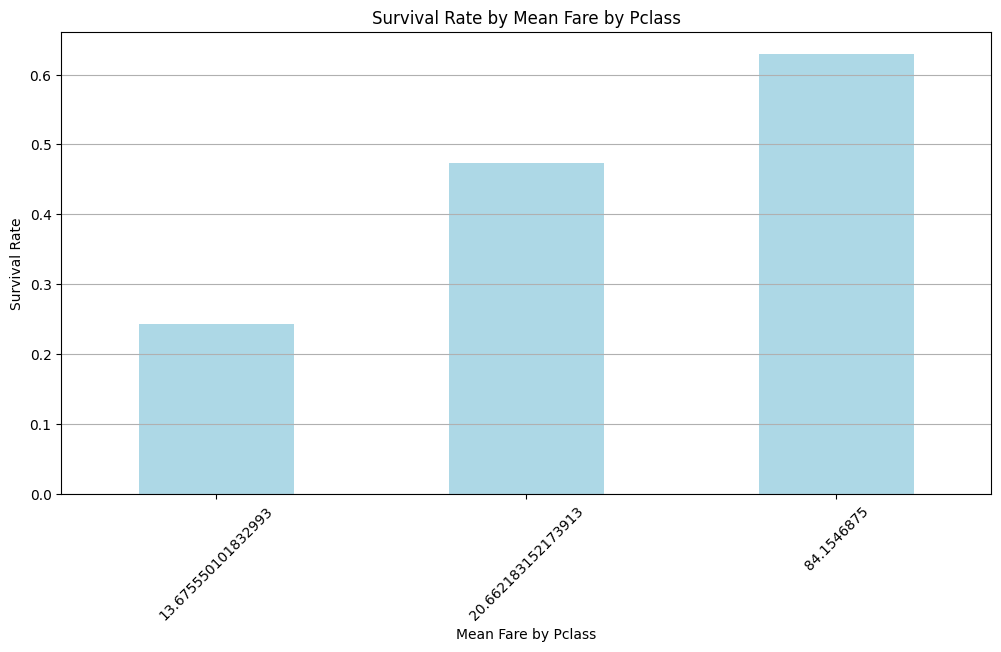

In [38]:
#  생존율과 Mean Fare by Pclass 간의 막대그래프 그리기

# 생존율 계산
survival_rate_by_fare = df.groupby('mean_fare_by_pclass')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(12, 6))
survival_rate_by_fare.plot(kind='bar', color='lightblue')
plt.title('Survival Rate by Mean Fare by Pclass')
plt.xlabel('Mean Fare by Pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

범주형 데이터를 수치형 데이터로 변환
- Label Encoding은 각 범주형 값을 고유한 정수로 변환. 이 방법은 범주형 변수에 순서나 순위가 있을 때 유용
- One-Hot Encoding은 각 범주형 값을 이진 벡터로 변환. 이 방법은 범주형 변수에 순서나 순위가 없을 때 유용

In [ ]:
from sklearn.preprocessing import LabelEncoder

data = {'color':['red','blue','green','blue','red']}

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
features = ['gender','age']
for feature in features:
    tdf[feature] = le.fit_transform(tdf[feature])
tdf

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,28,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,51,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,34,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,47,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,47,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,35,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,0,24,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,0,88,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,34,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
tdf2 = tdf[['gender','class']]
tdf2.head()

,gender,class
0,1,Third
1,0,First
2,0,Third
3,0,First
4,1,Third


In [ ]:
import pandas as pd
pd.get_dummies(tdf2).head()

,gender,class_First,class_Second,class_Third
0,1,False,False,True
1,0,True,False,False
2,0,False,False,True
3,0,True,False,False
4,1,False,False,True


Pandas는 주로 Matplotlib 라이브러리를 기반으로 하여 시각화를 구현하며, 간단한 코드로 다양한 그래프를 생성

[ 주요 시각화 함수 ]

plot(): 기본적인 시각화 함수를 제공하며, 다양한 종류의 그래프를 그릴 수 있다.

kind 매개변수를 통해 그래프의 종류를 지정할 수 있다. (line, bar, barh, hist, box, kde, density, area, pie, scatter, hexbin 등)

- hist(): 히스토그램을 생성.
- boxplot(): 박스 플롯을 생성.
- scatter_matrix(): 여러 변수 간의 산점도 행렬을 생성.
- plot.scatter(): 산점도를 생성.
- plot.bar(): 막대 그래프를 생성.
- plot.kde(): 커널 밀도 추정 그래프를 생성.

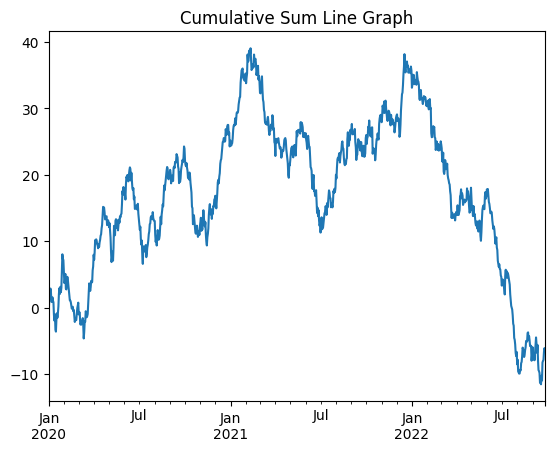

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2020',periods = 1000))
# randn 정규분포
ts = ts.cumsum()

# 라인 그래프
ts.plot()
plt.title('Cumulative Sum Line Graph')
plt.show()

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2020',periods = 1000))
ts1 = ts.cumsum()

df = pd.DataFrame({'value':ts,'cum':ts1})
df.head()

,value,cum
2020-01-01,-0.196656,-0.196656
2020-01-02,1.219374,1.022718
2020-01-03,-0.449149,0.573569
2020-01-04,-1.231184,-0.657615
2020-01-05,-0.573149,-1.230764


In [ ]:
num = np.random.randn(1000)
mean_val = num.mean()
std_dev = num.std()
print(mean_val,std_dev)

0.05519774697120826 1.0023960790338864


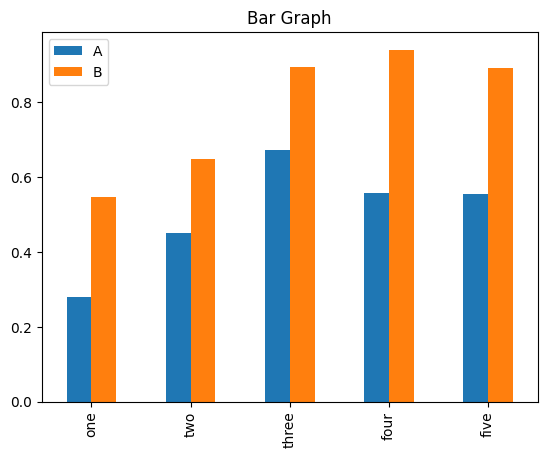

In [ ]:
df = pd.DataFrame({
    'A': np.random.rand(5),
    'B': np.random.rand(5)
},index = ['one','two','three','four','five'])

# 막대 그래프
df.plot.bar()
plt.title('Bar Graph')
plt.show()

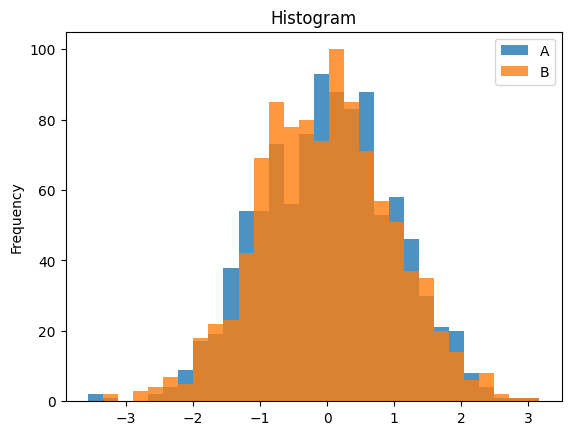

In [ ]:
df = pd.DataFrame({
    'A':np.random.randn(1000),
    'B':np.random.randn(1000)
})
# 히스토그램
# alpha 투명도 bins 구간 범위
df.plot.hist(alpha = 0.8,bins = 30)
plt.title('Histogram')
plt.show()

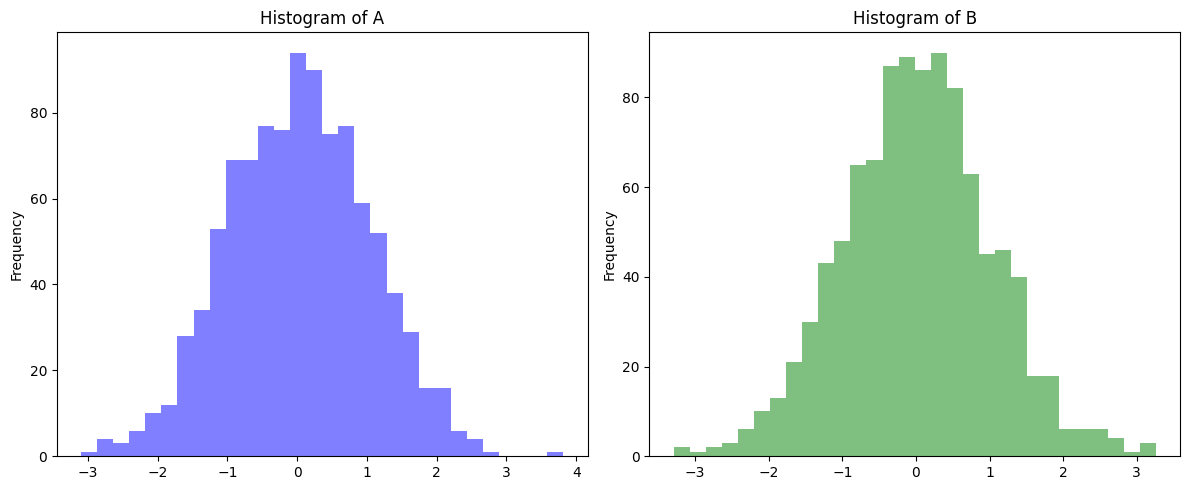

In [ ]:
df = pd.DataFrame({
    'A':np.random.randn(1000),
    'B':np.random.randn(1000)
})

# 그래프의 크기 설정
plt.figure(figsize=(12,5))
# 1번째 히스토그램
plt.subplot(1,2,1)
df['A'].plot.hist(alpha=0.5,bins=30,color='blue')
plt.title('Histogram of A')

# 2번재 히스토그램
plt.subplot(1, 2, 2)
df['B'].plot.hist(alpha=0.5, bins=30, color='green')
plt.title('Histogram of B')

# 레이아웃을 조정합니다.
plt.tight_layout()
plt.show()